# Call Geo Engine via API

In [35]:
import geoengine as ge
from datetime import datetime

## Initialize

In [36]:
# ge.initialize("http://peter.geoengine.io:6060")
ge.initialize("http://localhost:3030")

## Register workflow

In [37]:
workflow = ge.register_workflow({
	"type": "Vector",
	"operator": {
		"type": "RasterVectorJoin",
		"params": {
			"names": ["NDVI"],
			"aggregation": "none"
		},
		"sources": {
			"vector": {
				"type": "OgrSource",
				"params": {
					"dataset": {
						"internal": "628c419d-d57c-4850-a624-60f520488835"
					},
				}
			},
			"rasters": [{
				"type": "Expression",
				"params": {
					"expression": "1.0f * (A-B) / (A+B)",
					"outputType": "F32",
					"outputNoDataValue": -1,
				},
				"sources": {
					"a": {
						"type": "TemporalRasterAggregation",
						"params": {
							"aggregation": {
								"type": "mean",
								"ignoreNoData": True
							},
							"window": {
								"granularity": "Days",
								"step": 30
							}
						},
						"sources": {
							"raster": {
								"type": "Expression",
								"params": {
									"expression": "(B >= 7) ? 0 : A",
									"outputType": "U16",
									"outputNoDataValue": 0,
								},
								"sources": {
									"a": {
										"type": "GdalSource",
										"params": {
											"dataset": {
												"external": {
													"provider": "5779494c-f3a2-48b3-8a2d-5fbba8c5b6c5",
													"id": "UTM36S:B08"
												}
											}
										}
									},
									"b": {
										"type": "GdalSource",
										"params": {
											"dataset": {
												"external": {
													"provider": "5779494c-f3a2-48b3-8a2d-5fbba8c5b6c5",
													"id": "UTM36S:SCL"
												}
											}
										}
									},
								}
							}
						}
					},
					"b": {
						"type": "TemporalRasterAggregation",
						"params": {
							"aggregation": {
								"type": "mean",
								"ignoreNoData": True
							},
							"window": {
								"granularity": "Days",
								"step": 30
							}
						},
						"sources": {
							"raster": {
								"type": "Expression",
								"params": {
									"expression": "(B > 7) ? 0 : A",
									"outputType": "U16",
									"outputNoDataValue": 0,
								},
								"sources": {
									"a": {
										"type": "GdalSource",
										"params": {
											"dataset": {
												"external": {
													"provider": "5779494c-f3a2-48b3-8a2d-5fbba8c5b6c5",
													"id": "UTM36S:B04"
												}
											}
										}
									},
									"b": {
										"type": "GdalSource",
										"params": {
											"dataset": {
												"external": {
													"provider": "5779494c-f3a2-48b3-8a2d-5fbba8c5b6c5",
													"id": "UTM36S:SCL"
												}
											}
										}
									},
								}
							}
						}
					},
				}
			}]
		}
	}
})

workflow

c74c37fe-53c3-51ea-b8ab-09ab418288f4

## Get result metadata of workflow

In [38]:
workflow.get_result_descriptor()

Data type:         MultiPoint
Spatial Reference: EPSG:32736
Columns:           NDVI: float

## Get dataframe via WFS

In [39]:
time = datetime.strptime('2021-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

bounds = [650619.8559276887,9916254.118729865,654976.3607882614,9918738.406625563]

print(bounds[2]-bounds[0])
print(bounds[3]-bounds[1])

data = workflow.get_dataframe(
    ge.Bbox(
        #[-111.533203125, -4.482421875, 114.345703125, 73.388671875],
        bounds,
        #[472950.2425297845, 5629726.81375506, 482100.6349002005, 5634944.806098521],
        [time, time],
        srs='EPSG:32736',
        resolution=20.
        )
    )

data

,NDVI,geometry,start,end
0,0.705591,POINT (651871.900 9917317.492),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
1,0.556785,POINT (651948.288 9917317.492),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
2,0.649587,POINT (652003.044 9917331.688),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
3,0.624911,POINT (652009.804 9917265.440),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
4,0.417145,POINT (652156.497 9917393.204),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
5,0.370048,POINT (652213.281 9917508.801),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
6,0.554159,POINT (652328.877 9917625.749),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
7,0.409858,POINT (652261.277 9917505.421),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
8,0.351711,POINT (652288.317 9917479.733),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00
9,0.367278,POINT (652303.189 9917450.665),2021-04-01 12:00:00+00:00,2021-05-01 12:00:00+00:00


## Plot points colored by NDVI value

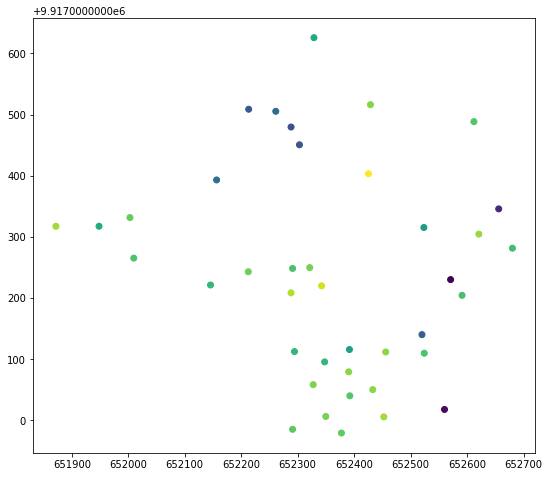

In [40]:
data.plot('NDVI', figsize=(16, 8));